# Pymaceuticals Inc.
---

### Analysis

- Capomulin is more effective than infubinol and ceftamine as we observed from the box plots. RAmicane is also effective drug compared to Capomulin.

- It was observed that tumor size in a mouse i509 decreased as time passed. 

- Positive corelation was observed between weight of the mouse and turmor size as p value is 0.84. Also a linear correlation. 

- so heavier the mouse the less effective the drug. 

- only one outleir was found with the help of box plot in Infubinol Drug.
 

In [63]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
data_df = pd.merge(mouse_metadata, study_results)

# Display the data table for preview
data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [5]:
# Checking the number of mice.
number_of_mice = len(mouse_metadata.groupby('Mouse ID').count())

print(f'Number of mice raw data: ',number_of_mice)

Number of mice raw data:  249


In [9]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
print(f'number of mice: {number_of_mice}')
duplicated_mouse = data_df[data_df.duplicated(['Mouse ID', 'Timepoint'])]
print(duplicated_mouse, sep='\n')
duplicate_mouse_ids = data_df.loc[data_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()

number of mice: 249
    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
909     g989     Propriva  Female          21          26          0   
911     g989     Propriva  Female          21          26          5   
913     g989     Propriva  Female          21          26         10   
915     g989     Propriva  Female          21          26         15   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
909           45.000000                 0  
911           47.570392                 0  
913           49.880528                 0  
915           53.442020                 0  
917           54.657650                 1  


In [13]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data = data_df.loc[data_df["Mouse ID"] == "g989"]
duplicate_mouse_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0


In [15]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_data = data_df[data_df['Mouse ID'].isin(duplicate_mouse_ids)==False]

In [16]:
# Checking the number of mice in the clean DataFrame.
print(f'Number of Mice after cleaning: ',len(clean_mouse_data.groupby('Mouse ID').count()))
clean_mouse_data.head()

Number of Mice after cleaning:  248


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary Statistics

In [19]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
tumor_volume_mean = clean_mouse_data.groupby(['Drug Regimen']).mean()['Tumor Volume (mm3)'].rename('Mean Tumor Volume')
tumor_volume_median = clean_mouse_data.groupby(['Drug Regimen']).median()['Tumor Volume (mm3)'].rename('Median Tumor Volume')
tumor_volume_var = clean_mouse_data.groupby(['Drug Regimen']).var()['Tumor Volume (mm3)'].rename('Tumor Volume Variance')
tumor_volume_std = clean_mouse_data.groupby(['Drug Regimen']).std()['Tumor Volume (mm3)'].rename('Tumor Volume Standard_deviation')
tumor_volume_sem = clean_mouse_data.groupby(['Drug Regimen']).sem()['Tumor Volume (mm3)'].rename('Tumor Volume Standard_error')
results_df = pd.DataFrame({'Mean Tumor Volume' : tumor_volume_mean,
                           'Median Tumor Volume' : tumor_volume_median,
                           'Tumor Volume Variance': tumor_volume_var,
                           'Tumor Volume Standard_deviation' : tumor_volume_std,
                           'Tumor Volume Standard_error' : tumor_volume_sem})
results_df.head()

C:\Users\pratik.deshmane\AppData\Local\Temp\ipykernel_9280\3048197694.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tumor_volume_mean = clean_mouse_data.groupby(['Drug Regimen']).mean()['Tumor Volume (mm3)'].rename('Mean Tumor Volume')
C:\Users\pratik.deshmane\AppData\Local\Temp\ipykernel_9280\3048197694.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tumor_volume_median = clean_mouse_data.groupby(['Drug Regimen']).median()['Tumor Volume (mm3)'].rename('Median Tumor Volume')
C:\Users\pratik.deshmane\AppData\Local\Temp\ipykernel_9280\3048197694.py:8: FutureWarning: The default value of numeric_on

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Standard_deviation,Tumor Volume Standard_error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [20]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
agg_summary_df = clean_mouse_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg(['mean','median','var', 'std', 'sem'])
agg_summary_df.head()

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


## Bar and Pie Charts

Text(0.5, 1.0, 'Number of Data Points for Each Treatment Regimen')

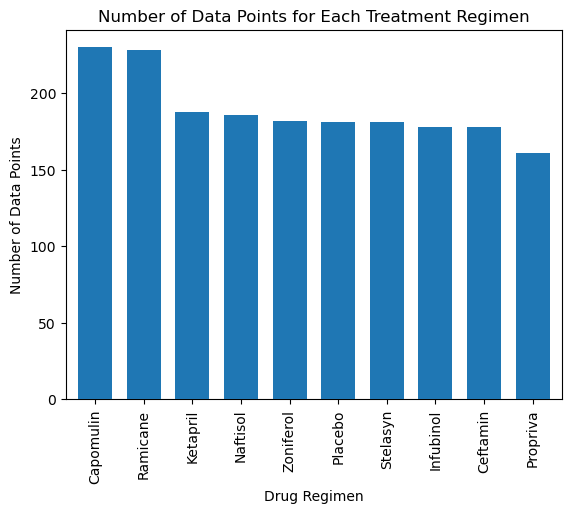

In [32]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
bar_plot = data_df['Drug Regimen'].value_counts().plot.bar(width=0.7, zorder=3)

# Set labels for axes
bar_plot.set_xlabel("Drug Regimen")
bar_plot.set_ylabel("Number of Data Points")
bar_plot.set_title("Number of Data Points for Each Treatment Regimen")

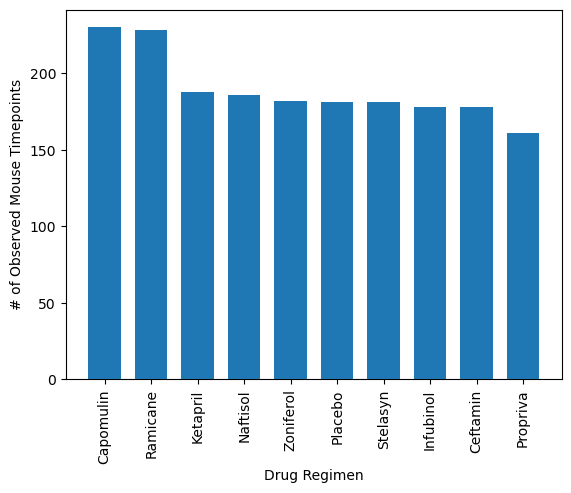

In [38]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
counts = data_df['Drug Regimen'].value_counts()
x_axis = np.arange(len(counts))
plt.bar(x_axis, counts, width = 0.7, zorder=3)
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, counts.index.values)
plt.xticks(rotation=90)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

plt.show()


Text(0, 0.5, '')

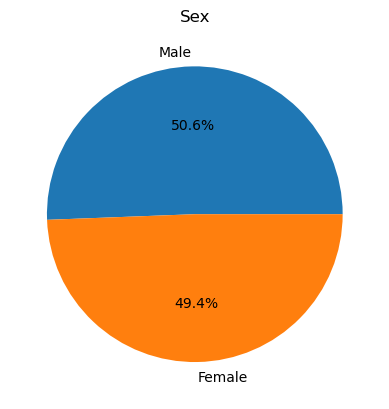

In [41]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
data = data_df['Sex'].value_counts()
pie_plot = data.plot.pie(y='',autopct="%1.1f%%", title='Sex')
pie_plot.set_ylabel('')

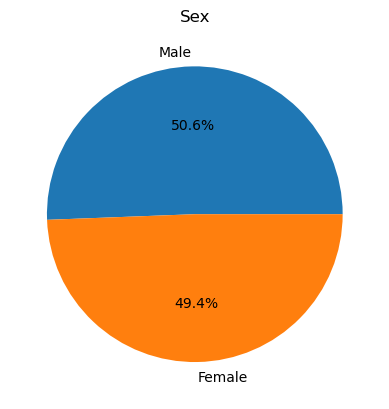

In [42]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
data = data_df['Sex'].value_counts()
plt.pie(data, labels=data.index.values, autopct="%1.1f%%")
plt.title('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [43]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint_df = clean_mouse_data.groupby(['Mouse ID'])['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
max_timepoint_df = greatest_timepoint_df.merge(clean_mouse_data,on=['Mouse ID','Timepoint'], how='left')
print(max_timepoint_df.head())

treatment_names = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

for name in range(len(treatment_names)):
    temp = max_timepoint_df[max_timepoint_df['Drug Regimen'] == treatment_names[name]]

  Mouse ID  Timepoint Drug Regimen     Sex  Age_months  Weight (g)  \
0     a203         45    Infubinol  Female          20          23   
1     a251         45    Infubinol  Female          21          25   
2     a262         45      Placebo  Female          17          29   
3     a275         45     Ceftamin  Female          20          28   
4     a366         30     Stelasyn  Female          16          29   

   Tumor Volume (mm3)  Metastatic Sites  
0           67.973419                 2  
1           65.525743                 1  
2           70.717621                 4  
3           62.999356                 3  
4           63.440686                 1  


In [51]:
# Put treatments into a list for for loop (and later for plot labels)

drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
drug_values = []


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in drugs:
    
    final_volume_df = max_timepoint_df.loc[max_timepoint_df['Drug Regimen'] == drug, 'Tumor Volume (mm3)']
    #final_volume_df = temp_df.loc[temp_df['Timepoint'] == temp_df['max_timepoint']]
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    #values = final_volume_df['Tumor Volume (mm3)']
    
    # add subset 
    drug_values.append(final_volume_df)

    # Determine outliers using upper and lower bounds

    quartiles = final_volume_df.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers_count = final_volume_df.loc[(final_volume_df < lower_bound) | 
                                        (final_volume_df > upper_bound)]
    print(f"{drug}'s potential outliers: {outliers_count}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


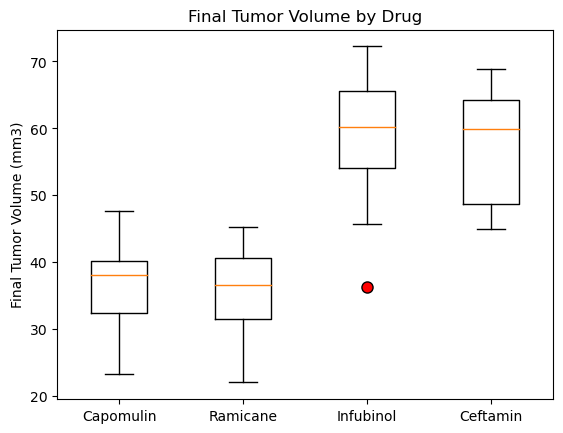

In [52]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
flierprops = dict(marker='o', markerfacecolor='r', markersize=8, markeredgecolor='black')
plt.boxplot(drug_values, flierprops=flierprops)

# Add title and labels to boxplot
plt.title('Final Tumor Volume by Drug')
plt.ylabel('Final Tumor Volume (mm3)')
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])

plt.show()

## Line and Scatter Plots

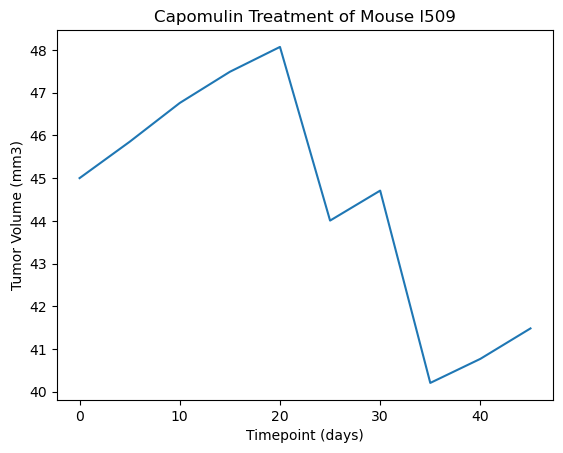

In [59]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_table = clean_mouse_data.loc[clean_mouse_data['Drug Regimen'] == "Capomulin"]
mouse = capomulin_table.loc[capomulin_table['Mouse ID'] == 'l509']
plt.plot(mouse['Timepoint'], mouse['Tumor Volume (mm3)'])
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse l509")
plt.show()


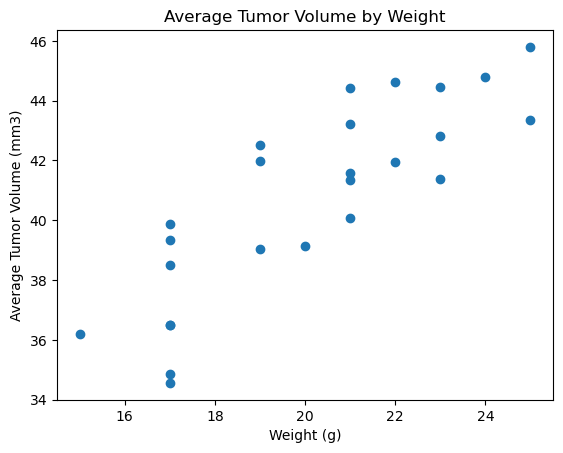

In [60]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_df = data_df.loc[data_df['Drug Regimen'] == 'Capomulin']

avg_vol_df = pd.DataFrame(capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index().rename(columns={'Tumor Volume (mm3)': 'avg_tumor_vol'})

avg_vol_df = pd.merge(capomulin_df, avg_vol_df, on='Mouse ID')
final_avg_vol_df = avg_vol_df[['Weight (g)', 'avg_tumor_vol']].drop_duplicates()
final_avg_vol_df

x = final_avg_vol_df['Weight (g)']
y = final_avg_vol_df['avg_tumor_vol']
plt.scatter(x, y)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume by Weight')
plt.show()

## Correlation and Regression

The correlation between weight and average tumor volume
on the Capomulin regimen is 0.84.


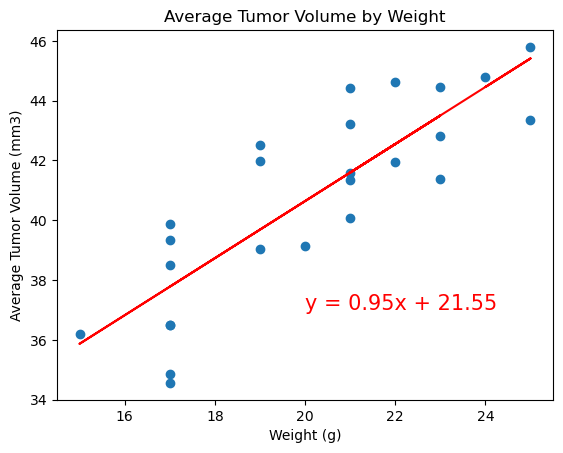

In [64]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

capomulin_df = data_df.loc[data_df['Drug Regimen'] == 'Capomulin']
avg_vol_df = pd.DataFrame(capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index().rename(columns={'Tumor Volume (mm3)': 'avg_tumor_vol'})
avg_vol_df = pd.merge(capomulin_df, avg_vol_df, on='Mouse ID')
final_avg_vol_df = avg_vol_df[['Weight (g)', 'avg_tumor_vol']].drop_duplicates()
final_avg_vol_df
x = final_avg_vol_df['Weight (g)']
y = final_avg_vol_df['avg_tumor_vol']

correlation = st.pearsonr(x,y)

print(f"""The correlation between weight and average tumor volume
on the Capomulin regimen is {round(correlation[0],2)}.""")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x,y)
plt.plot(x,regress_values,"r-")

plt.annotate(line_eq,(20,37),fontsize=15,color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume by Weight')
plt.show()